# Statistical Power Assignment

In [8]:
from numpy import array
import numpy as np
import pandas as pd
import math

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [4]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [6]:
result = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.8, ratio=1.0)
round(result,1)

0.4

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

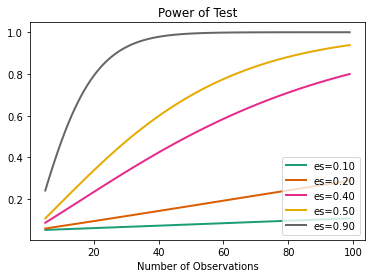

In [9]:
effect_sizes = array([0.1, 0.2, 0.4, 0.5, 0.9])
sample_sizes = array(range(5,100))

analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [13]:
result = analysis.solve_power(effect_size=.4, nobs1=100, alpha=0.05, power=None, ratio=1.0)
print(round(result * 100), "%")

80.0 %


Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

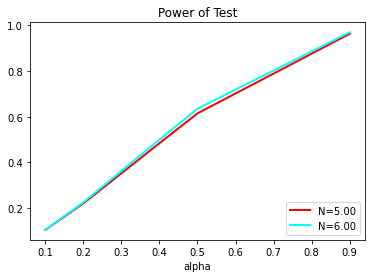

In [33]:
nobsy = array(range(5,7))
effect_sizes = array([0.1, 0.2, 0.4, 0.5, 0.9])
significance_levels = array([0.1, 0.2, 0.4, 0.5, 0.9])

analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', nobs=nobsy, alpha=significance_levels, effect_size=effect_sizes)
plt.show()

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [36]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [39]:
df =pd.read_csv(data_url)


df = df.dropna(subset=['Age'])

### Summarize the number of observations and average age per group.

In [47]:
alive = df[df['Survived'] == 1]
dead = df[df['Survived'] == 0]

print(alive['Age'].describe())
print(dead['Age'].describe())

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


### Perform t-test.

In [48]:
stats.ttest_ind(dead['Age'], alive['Age'])

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [53]:
avg_alive = alive['Age'].mean()
avg_dead = dead['Age'].mean()
n_obs1 = alive['Age'].count()
n_obs2 = dead['Age'].count()
var1 = alive['Age'].var()
var2 = dead['Age'].var()

pooled_stdev = math.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))
effect_size = (avg_dead - avg_alive) / pooled_stdev

print(effect_size)

0.15748597191363298


**Use the effect size you calculated to compute the statistical power of this test.**

In [54]:
result = analysis.solve_power(effect_size=effect_size, nobs1=n_obs1+n_obs2, alpha=0.05, power=None, ratio=1.0)
print(round(result * 100), "%")

84.0 %


**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [55]:
result = analysis.solve_power(effect_size=None, nobs1=n_obs1+n_obs2, alpha=0.05, power=0.8, ratio=1.0)
round(result,1)

0.1

**Determine the sample size necessary to get a statistical power of 0.8.**

In [57]:
sample = analysis.solve_power(effect_size=result, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(sample)

1430

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

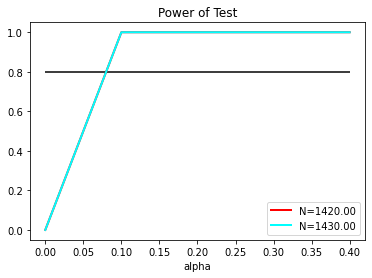

In [88]:
nobsy = array([1420, 1430])
effect_sizes = array([0.1, 0.2, 0.4, 0.5, 0.9])
significance_levels = array([0.0, 0.1, 0.2, 0.3, 0.4])

analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', nobs=nobsy, alpha=significance_levels, effect_size=effect_sizes)
plt.hlines(0.8, 0, 0.4)
plt.show()